# Africa Credit Challenge

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


In [2]:
base_path = os.path.join('', 'data')
train_path = os.path.join(base_path, 'Train.csv')
test_path = os.path.join(base_path, 'Test.csv')
e_indicators = os.path.join(base_path, 'economic_indicators.csv')


## Load the data

In [3]:
indicators = pd.read_csv(e_indicators)
indicators.head()

,Country,Indicator,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
0,Ghana,"Inflation, consumer prices (annual %)",41.509496,9.360932,29.772980,18.042739,15.438992,11.679184,10.734267,16.494640,...,15.489616,17.149970,17.454635,12.371922,7.808765,7.143640,9.887290,9.971089,31.255895,38.106966
1,Cote d'Ivoire,"Inflation, consumer prices (annual %)",4.361529,3.077265,3.296807,1.457988,3.885830,2.467191,1.892006,6.308528,...,0.448682,1.251500,0.723178,0.685881,0.359409,-1.106863,2.425007,4.091952,5.276167,4.387117
2,Kenya,"Inflation, consumer prices (annual %)",5.738598,1.961308,9.815691,11.624036,10.312778,14.453734,9.758880,26.239817,...,6.878155,6.582154,6.297250,8.005650,4.689806,5.239638,5.405162,6.107936,7.659863,7.671396
3,Ghana,"Official exchange rate (LCU per US$, period av...",0.716305,0.792417,0.866764,0.899495,0.905209,0.915107,0.932619,1.052275,...,2.896575,3.714642,3.909817,4.350533,4.585325,5.217367,5.595708,5.805700,8.272400,11.020408
4,Cote d'Ivoire,"Official exchange rate (LCU per US$, period av...",732.397693,693.713226,579.897426,527.338032,527.258363,522.425625,478.633718,446.000041,...,493.757330,591.211698,592.605615,580.656750,555.446458,585.911013,575.586005,554.530675,623.759701,606.569750


In [4]:
indicators.isnull().sum()

Country       0
Indicator     0
YR2001        7
YR2002        7
YR2003        7
YR2004        7
YR2005        3
YR2006        3
YR2007        3
YR2008        3
YR2009        3
YR2010        3
YR2011        3
YR2012        3
YR2013        3
YR2014        3
YR2015        6
YR2016        6
YR2017        6
YR2018       10
YR2019       10
YR2020       10
YR2021       10
YR2022       13
YR2023       13
dtype: int64

We will have to look further at how we can incorporate the indicators info for other countries

In [5]:
# Train and test datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print(train_df.shape, test_df.shape)

(68654, 16) (18594, 15)


In [6]:
train_df.isnull().sum()

ID                             0
customer_id                    0
country_id                     0
tbl_loan_id                    0
lender_id                      0
loan_type                      0
Total_Amount                   0
Total_Amount_to_Repay          0
disbursement_date              0
due_date                       0
duration                       0
New_versus_Repeat              0
Amount_Funded_By_Lender        0
Lender_portion_Funded          0
Lender_portion_to_be_repaid    0
target                         0
dtype: int64

as we can see there are no missing values from the train dataset. Which means one less thing to  worry about

In [7]:
test_df.isnull().sum()

ID                             0
customer_id                    0
country_id                     0
tbl_loan_id                    0
lender_id                      0
loan_type                      0
Total_Amount                   0
Total_Amount_to_Repay          0
disbursement_date              0
due_date                       0
duration                       0
New_versus_Repeat              0
Amount_Funded_By_Lender        0
Lender_portion_Funded          0
Lender_portion_to_be_repaid    0
dtype: int64

same thing with the test dataset. We can now proceed with EDA

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

## EDA

In [9]:
# Separating the columns into numerical and categorical columns
numerical_cols = [train_df.select_dtypes(include=['float64', 'int64']).columns]
cat_cols = [train_df.select_dtypes(include=['object']).columns]
print(numerical_cols, end='\n')
print(cat_cols)


[Index(['customer_id', 'tbl_loan_id', 'lender_id', 'Total_Amount',
       'Total_Amount_to_Repay', 'duration', 'Amount_Funded_By_Lender',
       'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'target'],
      dtype='object')]
[Index(['ID', 'country_id', 'loan_type', 'disbursement_date', 'due_date',
       'New_versus_Repeat'],
      dtype='object')]


### Numberical variables

1. Total Amount

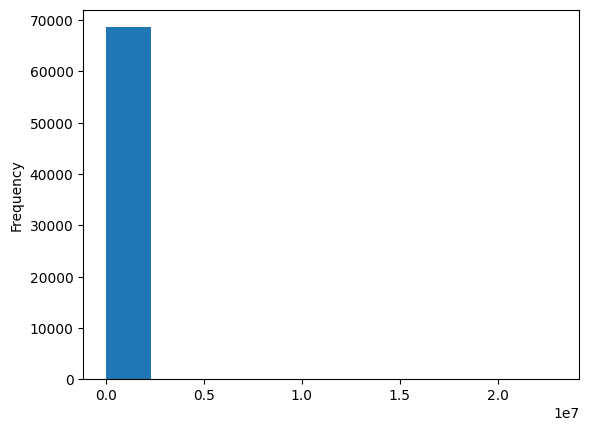

In [10]:
train_df['Total_Amount'].plot(kind='hist')
plt.show()


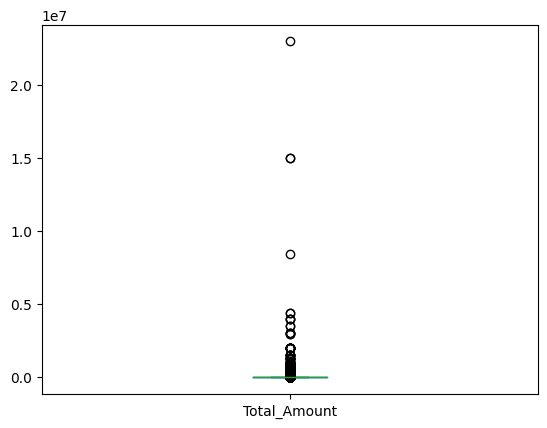

In [11]:
train_df['Total_Amount'].plot(kind='box');

In [12]:
print('minimum {0} : max {1} : avg {2}'.format(train_df['Total_Amount'].min(), train_df['Total_Amount'].max(), train_df['Total_Amount'].mean()))

minimum 2.0 : max 23000000.0 : avg 14836.82861697789


The data is highly positively skewed and the there is presence of outliers

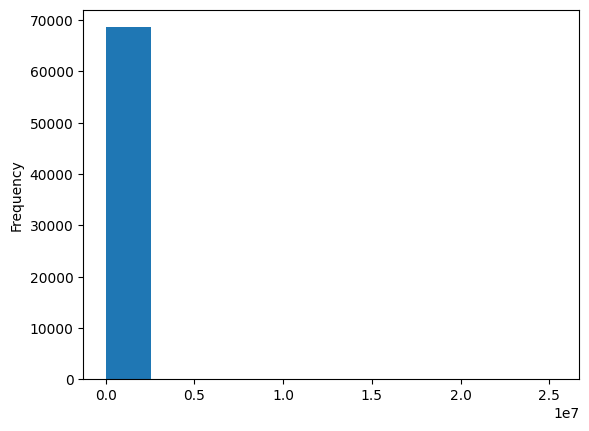

In [13]:
train_df['Total_Amount_to_Repay'].plot(kind='hist')
plt.show()

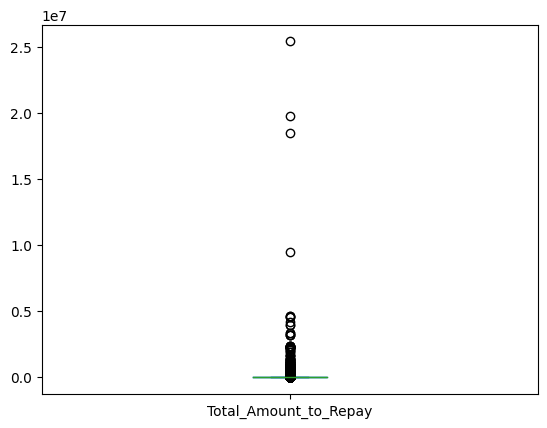

In [14]:
train_df['Total_Amount_to_Repay'].plot(kind='box')
plt.show()

In [15]:
print('minimum {0} : max {1} : avg {2}'.format(train_df['Total_Amount_to_Repay'].min(), train_df['Total_Amount_to_Repay'].max(), train_df['Total_Amount_to_Repay'].mean()))

minimum 0.0 : max 25415000.0 : avg 15639.929901243919


Which is similar to the graph aboove 

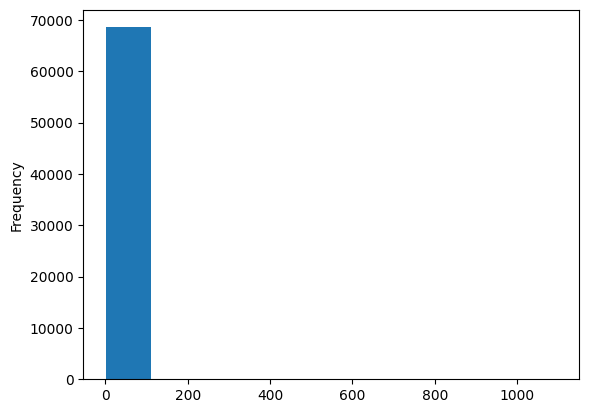

In [16]:
train_df['duration'].plot(kind='hist')
plt.show()

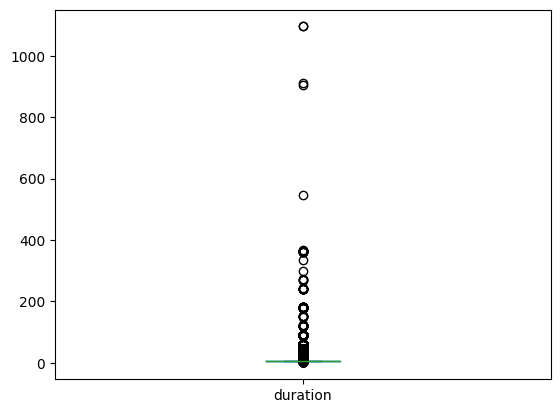

In [17]:
train_df['duration'].plot(kind='box')
plt.show()

In [18]:
print('minimum {0} : max {1} : avg {2}'.format(train_df['duration'].min(), train_df['duration'].max(), train_df['duration'].mean()))

minimum 1 : max 1096 : avg 8.54458589448539


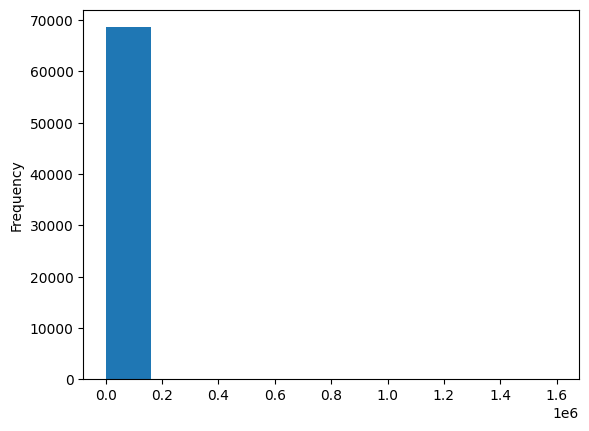

In [19]:
train_df['Amount_Funded_By_Lender'].plot(kind='hist')
plt.show()

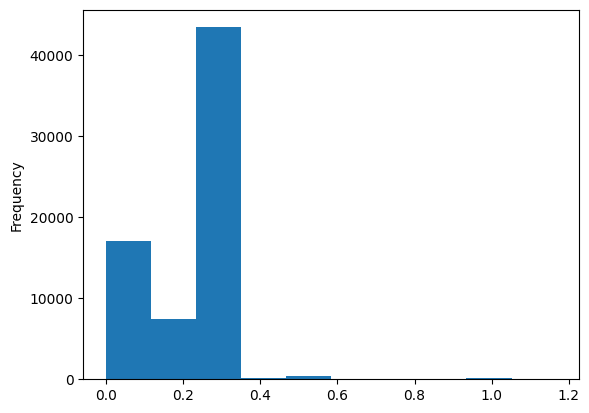

In [20]:
train_df['Lender_portion_Funded'].plot(kind='hist')
plt.show()

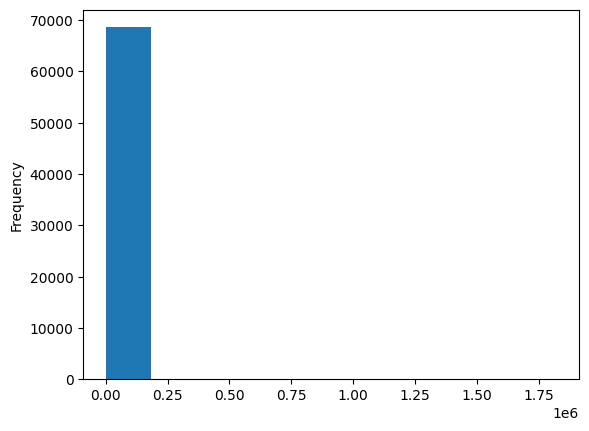

In [21]:
train_df['Lender_portion_to_be_repaid'].plot(kind='hist')
plt.show()

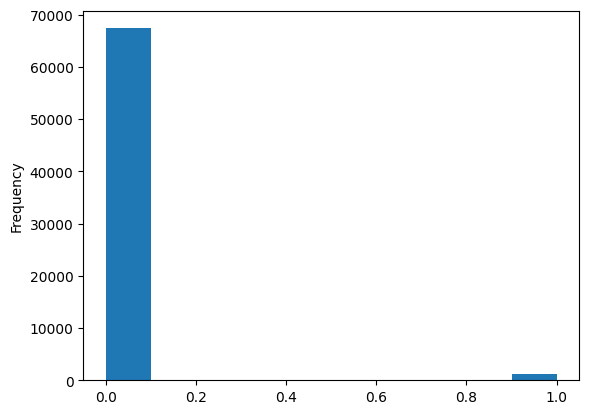

In [22]:
train_df['target'].plot(kind='hist')
plt.show()

In [23]:
train_df['target'].value_counts() / len(train_df)

0    0.981676
1    0.018324
Name: target, dtype: float64

From the visualisations we can come to these conclusions:
1. Most of the variables are positively skewed
2. There is presence of outliers
3. There is class imbalance in the `target` 
- we will now look at the best way of dealing with these problems

In [24]:
cat_cols

[Index(['ID', 'country_id', 'loan_type', 'disbursement_date', 'due_date',
        'New_versus_Repeat'],
       dtype='object')]

2. Categorical

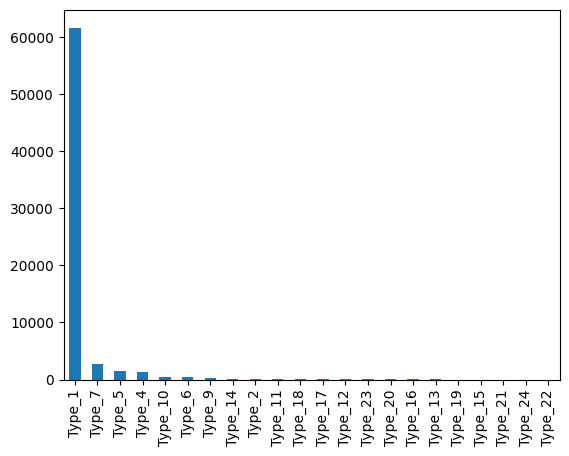

In [25]:
train_df['loan_type'].value_counts().plot(kind='bar')
plt.show()

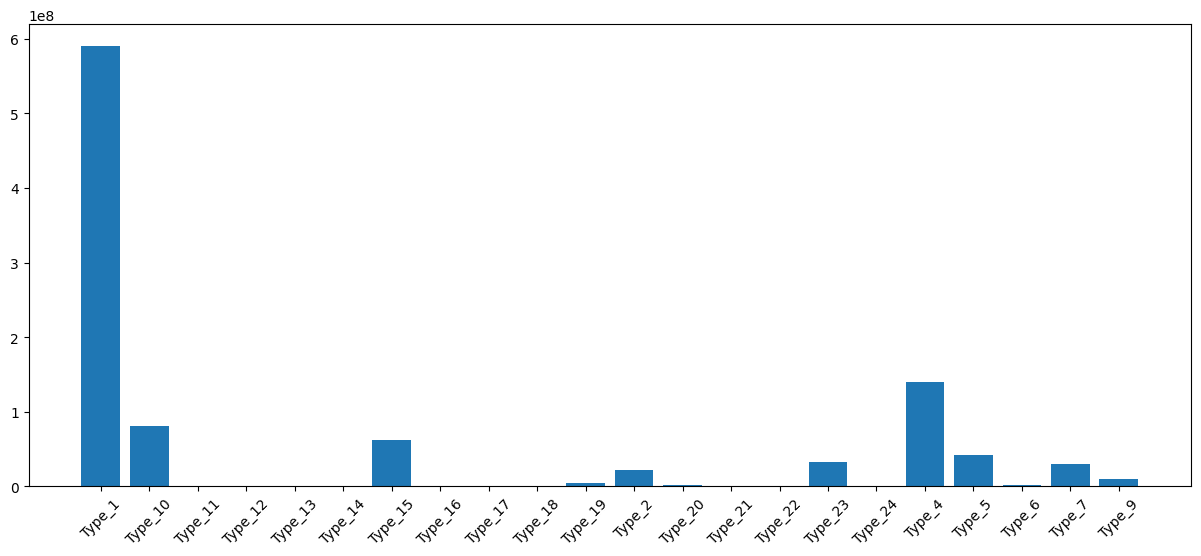

In [26]:
aggregate_total_amount = train_df.groupby('loan_type')['Total_Amount'].sum().reset_index()
plt.figure(figsize=(15,6))
plt.bar(aggregate_total_amount['loan_type'], aggregate_total_amount['Total_Amount'])
plt.xticks(rotation=45)
plt.show()

`Type_1` is the most common loan type and has the highest amount of disbursed funds

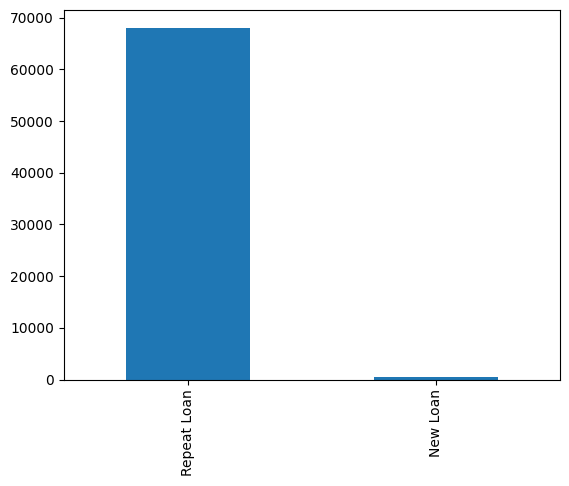

In [27]:
train_df['New_versus_Repeat'].value_counts().plot(kind='bar')
plt.show()

The majority of the people have a history of taking loans. Only a few number of people are new applicants

these columns are being treated as objects but should be treated as datetime data type 'disbursement_date', 'due_date'

In [28]:
def date_modifier(df):
    import datetime
    from datetime import datetime

    df['disbursement_date'] = pd.to_datetime(df['disbursement_date'])
    df['due_date'] = pd.to_datetime(df['due_date'])

    # Extract the day, week, month and year for disbursement date
    
    df['disburement_week'] = df['disbursement_date'].dt.isocalendar().week
    df['disburement_month'] = df['disbursement_date'].dt.month
    df['disburement_year'] = df['disbursement_date'].dt.year
    df['disburement_day'] = df['disbursement_date'].dt.day
    return df

In [29]:
train_df_mod = date_modifier(train_df)

In [30]:
train_df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           68654 non-null  object        
 1   customer_id                  68654 non-null  int64         
 2   country_id                   68654 non-null  object        
 3   tbl_loan_id                  68654 non-null  int64         
 4   lender_id                    68654 non-null  int64         
 5   loan_type                    68654 non-null  object        
 6   Total_Amount                 68654 non-null  float64       
 7   Total_Amount_to_Repay        68654 non-null  float64       
 8   disbursement_date            68654 non-null  datetime64[ns]
 9   due_date                     68654 non-null  datetime64[ns]
 10  duration                     68654 non-null  int64         
 11  New_versus_Repeat            68654 non-nu

In [41]:
categorical = ['loan_type', 'New_versus_Repeat']

In [42]:
train_df_mod[categorical].nunique()

loan_type            22
New_versus_Repeat     2
dtype: int64

In [43]:
for i in categorical:
    print(i)
    print(train_df_mod[i].unique())
    print()

loan_type
['Type_1' 'Type_7' 'Type_5' 'Type_4' 'Type_6' 'Type_14' 'Type_9' 'Type_10'
 'Type_19' 'Type_16' 'Type_2' 'Type_11' 'Type_23' 'Type_18' 'Type_17'
 'Type_12' 'Type_20' 'Type_13' 'Type_21' 'Type_15' 'Type_24' 'Type_22']

New_versus_Repeat
['Repeat Loan' 'New Loan']



In [51]:
repeat_loan_rate = train_df_mod[train_df_mod.loan_type == 'Repeat Loan'].target.mean()
new_loan_rate = train_df_mod[train_df_mod.loan_type == 'New Loan'].target.mean()

In [52]:
new_loan_rate

nan

In [54]:
global_default = train_df_mod.target.mean()

In [55]:
from IPython.display import display

In [56]:
for c in categorical:
    print(c)
    df_group = train_df_mod.groupby(c).target.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_default
    df_group['risk'] = df_group['mean'] / global_default
    display(df_group)
    print()
    print()

loan_type


,mean,count,diff,risk
loan_type,,,,
Type_1,0.008425,61723,-0.009899,0.459771
Type_10,0.025751,466,0.007427,1.405337
Type_11,0.047619,42,0.029295,2.598758
Type_12,0.047619,21,0.029295,2.598758
Type_13,0.000000,10,-0.018324,0.000000
Type_14,0.717172,99,0.698848,39.138877
Type_15,0.750000,4,0.731676,40.930445
Type_16,0.000000,12,-0.018324,0.000000
Type_17,0.000000,23,-0.018324,0.000000




New_versus_Repeat


,mean,count,diff,risk
New_versus_Repeat,,,,
New Loan,0.209877,567,0.191553,11.453787
Repeat Loan,0.016729,68087,-0.001595,0.912945


In [57]:
from sklearn.metrics import mutual_info_score

In [59]:
def mutual_info(series):
    return mutual_info_score(train_df_mod['target'], series)

mi = train_df_mod[categorical].apply(mutual_info)
mi

loan_type            0.016979
New_versus_Repeat    0.002882
dtype: float64

In [60]:
numerical_cols

[Index(['customer_id', 'tbl_loan_id', 'lender_id', 'Total_Amount',
        'Total_Amount_to_Repay', 'duration', 'Amount_Funded_By_Lender',
        'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'target'],
       dtype='object')]

In [61]:
num_cols = ['Total_Amount',
            'Total_Amount_to_Repay', 'duration', 'Amount_Funded_By_Lender',
            'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'target']
train_df_mod[num_cols].corrwith(train_df_mod['target'])

Total_Amount                   0.086043
Total_Amount_to_Repay          0.087089
duration                       0.189889
Amount_Funded_By_Lender        0.101845
Lender_portion_Funded          0.045418
Lender_portion_to_be_repaid    0.109517
target                         1.000000
dtype: float64